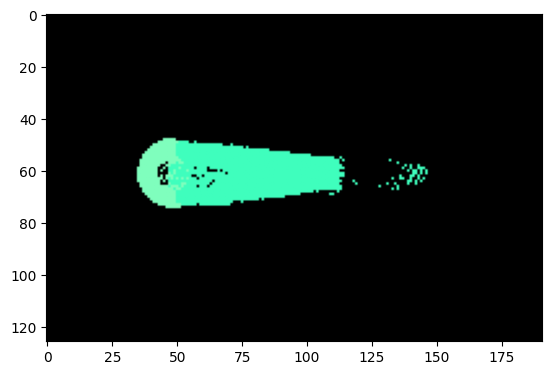

very litte pct white ../data/sparse_segmentation_mask.png


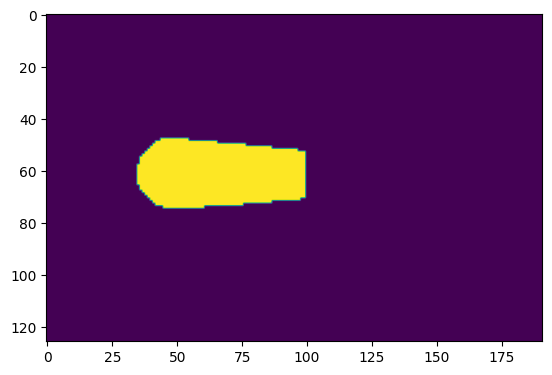

very litte pct white ../data/sparse_segmentation_mask.png


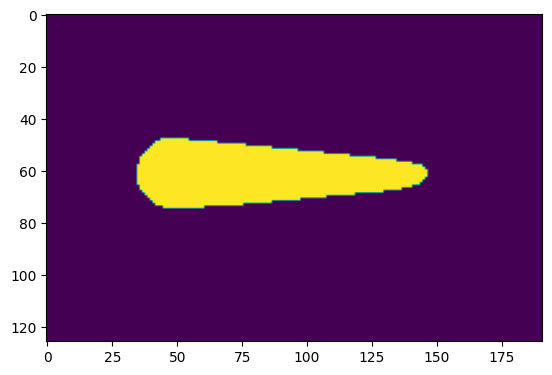

very litte pct white ../data/sparse_segmentation_mask.png


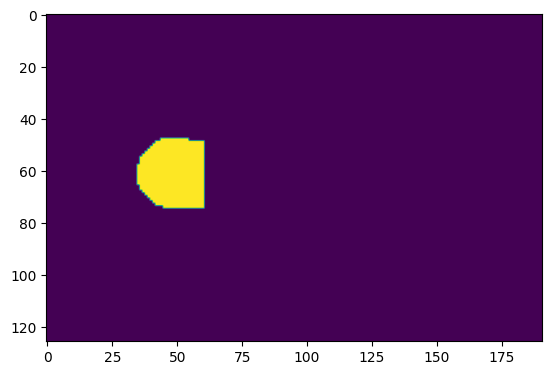

In [1]:
from PIL import Image

import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np


from scipy import ndimage
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

erosion_dilation_range = 20

img_path = "../data/sparse_segmentation_mask.png"


def process(segimg_fname: str, max_ratio: float = 2.5):
    seg_image = plt.imread(segimg_fname)

    non_zero_mask = seg_image[..., :3].sum(2) > 0

    non_zero_mask = ndimage.binary_dilation(
        non_zero_mask, iterations=erosion_dilation_range
    )
    non_zero_mask = ndimage.binary_erosion(
        non_zero_mask, iterations=erosion_dilation_range
    )

    non_zero_mask = convex_hull_image(non_zero_mask)

    masked_coor = np.where(non_zero_mask)

    xmax = masked_coor[1].max()
    xmin = masked_coor[1].min()
    ymax = masked_coor[0].max()
    ymin = masked_coor[0].min()

    width = xmax - xmin
    height = ymax - ymin

    ratio = width / height

    if ratio > max_ratio:
        clipped_xmax = int(xmin + (max_ratio * height))
        # print(clipped_xmax)
        non_zero_mask[:, clipped_xmax:, ...] = 0

    pct_white = non_zero_mask.sum() / non_zero_mask.size

    if pct_white > 0.02:
        print("very litte pct white", segimg_fname)
    #         exit(1)

    img_array = non_zero_mask.astype(np.uint8) * 1

    image = Image.fromarray(img_array).convert("L")
    return image


plt.imshow(plt.imread(img_path))
plt.show()
plt.imshow(process(img_path))
plt.show()
plt.imshow(process(img_path, max_ratio=1000))
plt.show()
plt.imshow(process(img_path, max_ratio=1))
plt.show()